In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


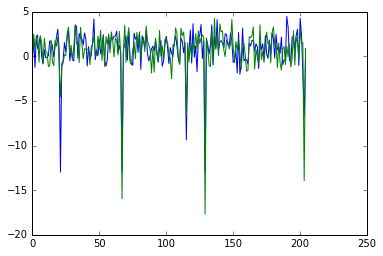

In [3]:
data = pd.read_csv('data-logistic.csv', header=None)
plt.plot(data[1]);
plt.plot(data[2]);
data.head()

In [82]:
X = data[[1, 2]]
y = data[0]
w = [0, 0]
k = 0.1
C = 10

In [66]:
def sigmoid(X, y, w):
    return 1 + np.exp(-y.multiply(X.dot(w)))

def sigmoid_dx(X, y, w):
    return 1 - 1/sigmoid(X, y, w)

In [71]:
def cost(X, y, w):
    l    = float(len(y))
    cost = 0.5 * l * sum(np.log(sigmoid(X, y, w)))
    return cost

def costL1(X, y, w, C):
    cost = Cost(X, y, w)
    reg  = 0.5 * C * (norm(w) ** 2)
    return cost + reg

def norm(w):
    return np.linalg.norm(w)

In [90]:
def grad(X, y, w, k):
    l = float(len(y))
    grad1 = y.multiply(X[1]).multiply(sigmoid_dx(X, y, w))
    grad2 = y.multiply(X[2]).multiply(sigmoid_dx(X, y, w))
    w1 = w[0] + k/l * sum(grad1)
    w2 = w[1] + k/l * sum(grad2)
    return [w1, w2]

def gradL1(X, y, w, C, k):
    l = float(len(y))
    grad1 = y.multiply(X[1]).multiply(sigmoid_dx(X, y, w))
    grad2 = y.multiply(X[2]).multiply(sigmoid_dx(X, y, w))
    w1 = w[0] + k/l * sum(grad1) - k * C * w[0]
    w2 = w[1] + k/l * sum(grad2) - k * C * w[1]
    return [w1, w2]

13417.9522273


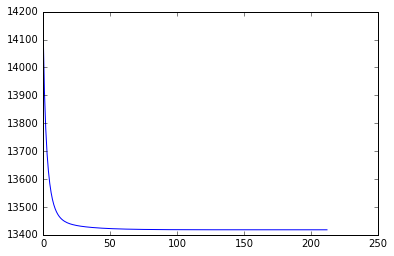

In [101]:
costs = []
weights1 = w
for i in xrange(10000):
    weights = grad(X, y, weights1, k)
    if abs(norm(weights) - norm(weights1)) < 0.00001:
        break;
    weights1 = weights
    costs.append(cost(X, y, weights1))
plt.plot(costs)
print costs.pop()

14223.2777753


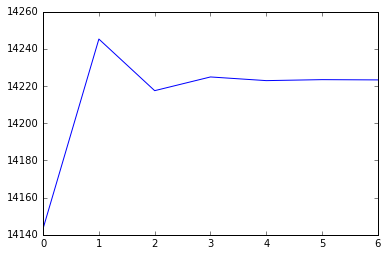

In [102]:
costs = []
weights2 = w
for i in xrange(10000):
    weights = gradL1(X, y, weights2, C, k)
    if abs(norm(weights) - norm(weights2)) < 0.00001:
        break;
    weights2 = weights
    costs.append(costL1(X, y, weights2, C))
plt.plot(costs)
print costs.pop()

In [103]:
pred1 = 1/np.exp(-X.dot(weights1))
pred2 = 1/np.exp(-X.dot(weights2))
print roc_auc_score(y, pred1)
print roc_auc_score(y, pred2)

0.926857142857
0.936285714286


In [99]:
print 1

1
